In [72]:
var("x,y,a");a=0

In [73]:
eq1=-a+1.*x^2+2*y^2

In [74]:
eq2=1.*y+1.*y^2

Trobem els punts d'equilibri.

In [75]:
sol=solve([eq1,eq2],x,y);sol

[[x == 0, y == 0], [x == -I*sqrt(2), y == -1], [x == I*sqrt(2), y == -1]]

En aquest cas només tenim 1 punt d'equilibri amb sentit físic ja que els altres són complexes.

In [76]:
qx=sol[0][0].rhs();
qy=sol[0][1].rhs();

Dibuix del camp vectorial

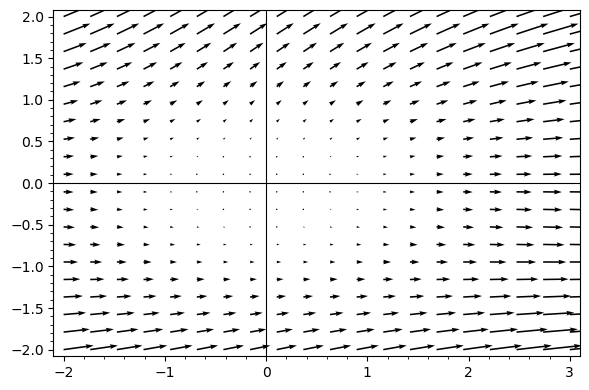

In [77]:
plot=plot_vector_field((eq1,eq2), (x,qx-2,qx+3), (y,qy-2,qy+2));plot

Equacions en funció de t

In [78]:
var("t");
x1=function("x1")(t);
y1=function("y1")(t);
eqd1=diff(x1(t),t)==eq1.subs(x=x1(t),y=y1(t));
eqd2=diff(y1(t),t)==eq2.subs(x=x1(t),y=y1(t));
show(eqd1)
show(eqd2)

diff(x1(t), t) == 1.00000000000000*x1(t)^2 + 2*y1(t)^2

diff(y1(t), t) == 1.00000000000000*y1(t)^2 + 1.00000000000000*y1(t)

Estudi de cada punt singular a partir del calcul dels vaps de la matriu diferencial o jacobià a cada punt d'equilibri trobat.

Càlcul del Jacobià

In [79]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]);A

[    2.00000000000000*x                    4*y]
[                     0 2.00000000000000*y + 1]

Ara analitzarem el comportament de cada punt d'equilibri

In [80]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=qx,y=qy);A

[0 0]
[0 1]

Tenim una matriu que fora de la diagonal té valors 0 i en la diagonal 0,1 així que els vaps seran λ=0,λ=1

In [81]:
A.eigenvalues()

[0, 1]

Representem els veps de cada vap indicant si són atractors o repulsors amb els colors blau i vermell

In [82]:
px=qx;py=qy;
vec=A.eigenvectors_right();vec

[(0, [(1, 0)], 1), (1, [(0, 1)], 1)]

In [83]:
h=0.01 # farem un petit desplaçament del punt singular en la direcció del vector propi
step1=0.01 # El pas de integració
kt=99.5;

sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

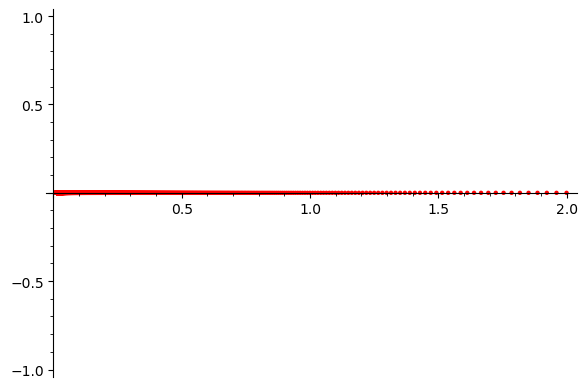

In [84]:
sol1=[[j,k] for i,j,k in sol]
sep1=list_plot(sol1,color="red")
sep1

In [85]:
kt=99.5;
sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

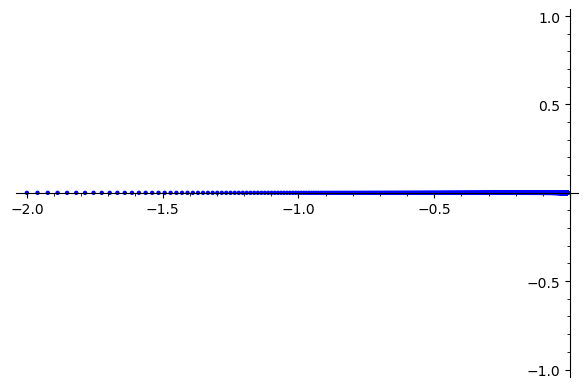

In [86]:
sol1=[[j,k] for i,j,k in sol]
sep2=list_plot(sol1,color="blue")
sep2

representem els veps de vap 1

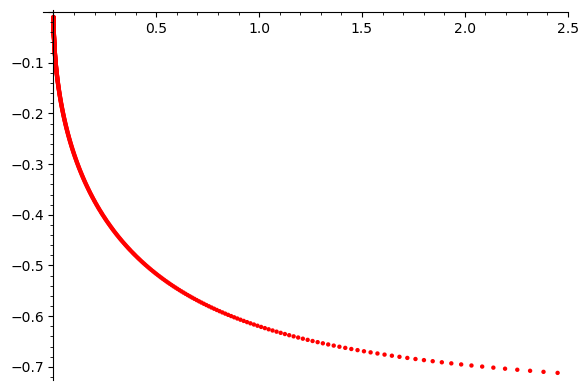

In [87]:
kt=5.5;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
if(vec[1][0]<0):
    sep3=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep3=list_plot(sol1,color="red")
sep3


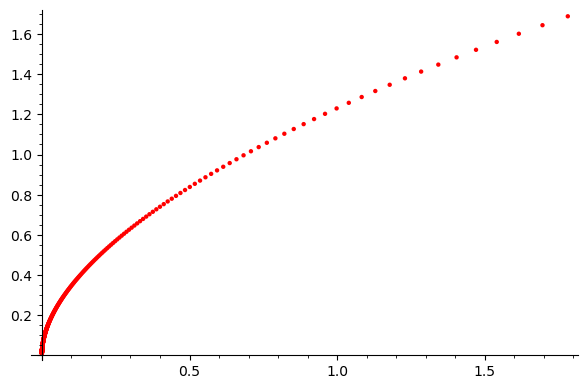

In [89]:
kt=4.15;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol1=[[j,k] for i,j,k in sol]
if(vec[1][0]<0):
    sep4=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep4=list_plot(sol1,color="red")
sep4

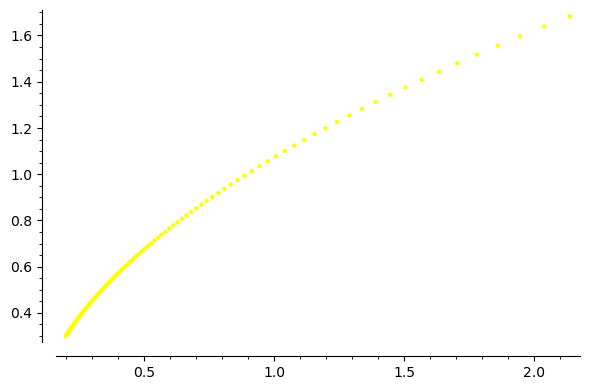

In [90]:
px=0.2;py=0.3;kt=1;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol2=[[j,k] for i,j,k in sol]
orb1=list_plot(sol2,color="yellow")
orb1



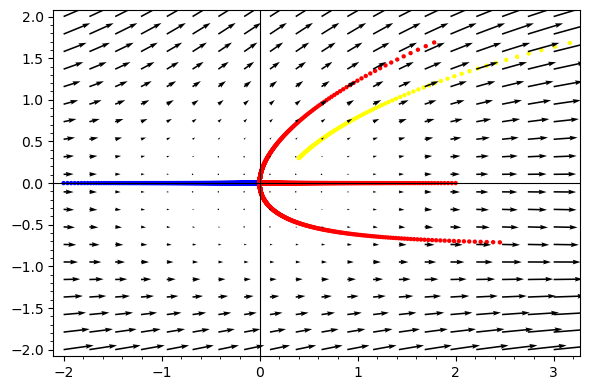

In [91]:
tot=orb2+sep1+sep2+sep3+sep4+plot
tot

En aquest cas podem veure que quan alfa és 0,ens situem en punt que ens situem sempre ens anirem cap a la dreta.
En els casos anteriors veiem com la órbita anava cap en direcció cap a l'esquerra i deprés cap a la dreta, en  aquest cas quan alfa és 0, no hi ha punt on la órbita vagi cap a l'esquerra.

In [92]:
px=0.4;py=0.3;kt=1;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol2=[[j,k] for i,j,k in sol]
orb2=list_plot(sol2,color="yellow")

px=0.8;py=0.3;kt=1;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol2=[[j,k] for i,j,k in sol]
orb3=list_plot(sol2,color="yellow")


px=0.82;py=0.3;kt=1;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
sol2=[[j,k] for i,j,k in sol]
orb4=list_plot(sol2,color="yellow")



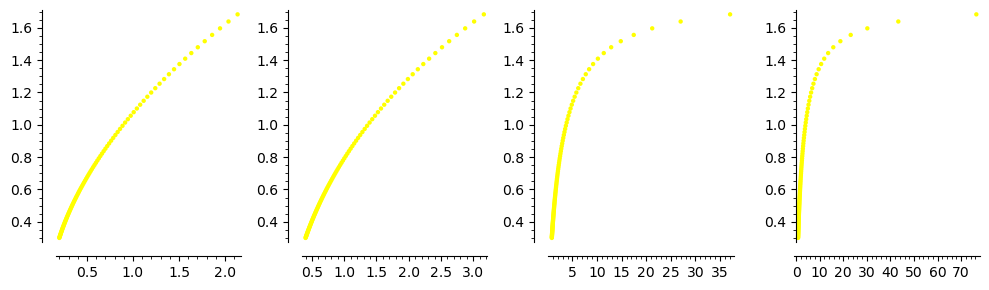

In [93]:
graphics_array([orb1,orb2,orb3,orb4]).show(figsize=(10,3))